In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import pickle  # Import the pickle library
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import pandas as pd
from sqlalchemy import create_engine

# Paramètres pour la connexion à SQL Server
server = 'DIRAR'
database = 'DATA WAREHOUSE'
username = 'sa'
password = 'azerty123'

# Création du moteur SQLAlchemy pour SQL Server
engine = create_engine(
    f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
)

# Charger les tables nécessaires dans des DataFrames pandas
dim_admission = pd.read_sql("SELECT * FROM dim_admission", engine)
dim_patients = pd.read_sql("SELECT * FROM dim_patients", engine)
dim_doctor = pd.read_sql("SELECT * FROM dim_doctor", engine)
dim_reclamation = pd.read_sql("SELECT * FROM dim_reclamation", engine)
dim_temps = pd.read_sql("SELECT * FROM dim_temps", engine)
satisfaction_fact = pd.read_sql("SELECT * FROM satisfaction_fact", engine)

# Affichage de quelques lignes pour vérifier
print(dim_admission.head())
print(dim_patients.head())
print(satisfaction_fact.head())

   hadm_id admission_type         admission_location        discharge_location
0   100375      EMERGENCY  TRANSFER FROM HOSP/EXTRAM                       SNF
1   100969      EMERGENCY       EMERGENCY ROOM ADMIT              DEAD/EXPIRED
2   101361      EMERGENCY  TRANSFER FROM HOSP/EXTRAM  REHAB/DISTINCT PART HOSP
3   103379      EMERGENCY       EMERGENCY ROOM ADMIT          HOME HEALTH CARE
4   103770      EMERGENCY       EMERGENCY ROOM ADMIT  REHAB/DISTINCT PART HOSP
   subject_id insurance language  religion marital_status  \
0       10006  Medicare           CATHOLIC      SEPARATED   
1       10011   Private           CATHOLIC         SINGLE   
2       10013  Medicare           CATHOLIC                  
3       10017  Medicare           CATHOLIC       DIVORCED   
4       10019  Medicare           CATHOLIC       DIVORCED   

                ethnicity  
0  BLACK/AFRICAN AMERICAN  
1   UNKNOWN/NOT SPECIFIED  
2   UNKNOWN/NOT SPECIFIED  
3                   WHITE  
4                  


--- Correlation Analysis for DataFrame: dim_admission ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_patients ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_doctor ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_reclamation ---
Not enough numerical columns to calculate correlation.
--------------------------------------------------

--- Correlation Analysis for DataFrame: dim_temps ---

Correlation Matrix:
          temps_ID     Annee      Mois      Jour
temps_ID  1.000000  0.047671 -0.201804 -0.112588
Annee     0.047671  1.000000 -0.196396  0.213991
Mois     -0.201804 -0.196396  1.000000 -0.009159
Jour     -0.112588  0.213991 -0.009159  1.000000


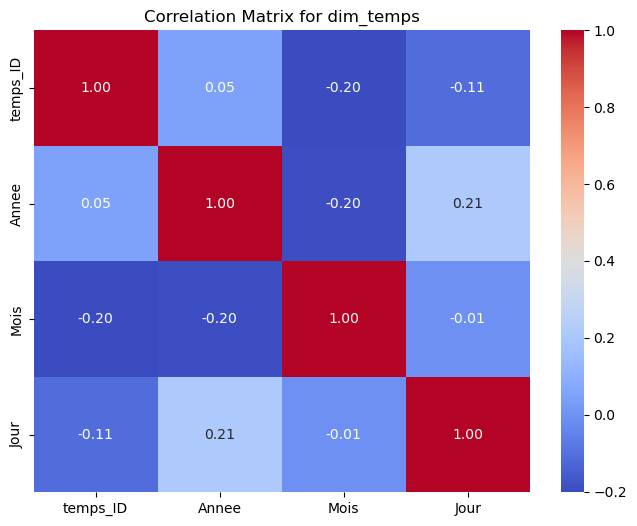

--------------------------------------------------

--- Correlation Analysis for DataFrame: satisfaction_fact ---

Correlation Matrix:
                      hadm_id  Doctor_ID  subject_id  temps_ID  \
hadm_id              1.000000  -0.061245   -0.269488 -0.263811   
Doctor_ID           -0.061245   1.000000    0.831152  0.839890   
subject_id          -0.269488   0.831152    1.000000  0.979399   
temps_ID            -0.263811   0.839890    0.979399  1.000000   
Resolution_Days      0.058401   0.391296    0.442040  0.494674   
Satisfaction_Impact -0.000212  -0.403977   -0.388900 -0.460742   
complaint_count      0.137506  -0.168072   -0.190834 -0.117679   

                     Resolution_Days  Satisfaction_Impact  complaint_count  
hadm_id                     0.058401            -0.000212         0.137506  
Doctor_ID                   0.391296            -0.403977        -0.168072  
subject_id                  0.442040            -0.388900        -0.190834  
temps_ID                    

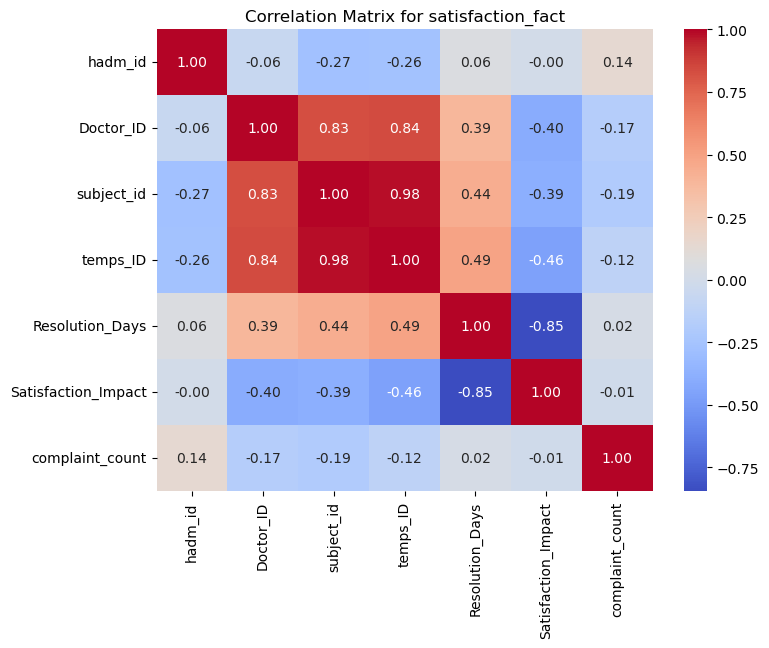

--------------------------------------------------


In [12]:
# List of your DataFrames
dataframes = {
    'dim_admission': dim_admission,
    'dim_patients': dim_patients,
    'dim_doctor': dim_doctor,
    'dim_reclamation': dim_reclamation,
    'dim_temps': dim_temps,
    'satisfaction_fact': satisfaction_fact
}

for name, df in dataframes.items():
    print(f"\n--- Correlation Analysis for DataFrame: {name} ---")

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number'])

    if numerical_cols.empty or numerical_cols.shape[1] < 2:
        print("Not enough numerical columns to calculate correlation.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numerical_cols.corr()
        print("\nCorrelation Matrix:")
        print(correlation_matrix)

        # Optional: Visualize the correlation matrix using a heatmap
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix for {name}')
        plt.show()

    print("-" * 50)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare data
X = satisfaction_fact[['Resolution_Days']]
y = satisfaction_fact['Satisfaction_Impact']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor - Mean Squared Error: {mse_dt:.2f}")
print(f"Decision Tree Regressor - R-squared: {r2_dt:.2f}")


Decision Tree Regressor - Mean Squared Error: 0.25
Decision Tree Regressor - R-squared: 0.50


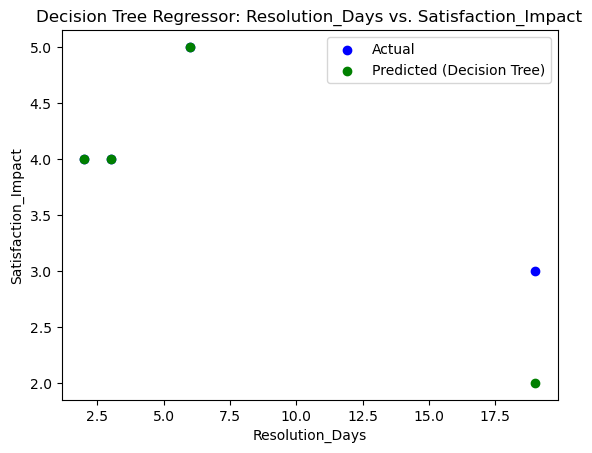

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_test['Resolution_Days'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Resolution_Days'], y_pred_dt, color='green', label='Predicted (Decision Tree)')
plt.xlabel('Resolution_Days')
plt.ylabel('Satisfaction_Impact')
plt.title('Decision Tree Regressor: Resolution_Days vs. Satisfaction_Impact')
plt.legend()
plt.show()

In [42]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)  # Added protocol
print(f"Trained Decision Tree model saved as {filename}")

Trained Decision Tree model saved as model.pkl
